In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [2]:
%qtconsole

## Set up output

In [3]:
mclab = os.getenv('MCLAB')
odir = os.path.join(mclab, 'cegs_ase_paper/pipeline_output/emp_bayesian/PG_model/')

## Import data

In [4]:
fname = '/home/jfear/mclab/cegs_ase_paper/pipeline_output/emp_bayesian/PG_model/emp_for_plotting.csv'
dat = pd.read_csv(fname)
dat.head(3)

,line,ms,fusion_id,q4,q4_q025,q4_q975,q5,q5_q025,q5_q975,q6,q6_q025,q6_q975,flag_q4_AI,flag_q5_AI,flag_q6_AI,flag_all_AI,mean_apn,rank_apn,qsim_line,flag_qsim_bias
0,r101,M,F10001_SI,0.572,0.422,0.723,0.480,0.334,0.624,0.387,0.250,0.529,0,0,0,0,14.255319,1,0.5,0
1,r101,V,F10001_SI,0.513,0.446,0.582,0.415,0.353,0.480,0.324,0.262,0.384,0,1,1,0,44.595745,2,0.5,0
2,r101,M,F10005_SI,0.573,0.517,0.627,0.475,0.419,0.536,0.379,0.327,0.435,1,0,1,0,29.523922,2,0.5,0


## Generate Plots for Mated and Virgin

In [5]:
# Split dataset by sex
mated = dat[dat['ms'] == 'M'][['fusion_id', 'line','q4', 'q5', 'q6']]
mated.set_index('fusion_id', inplace=True)
virgin = dat[dat['ms'] == 'V'][['fusion_id', 'line','q4', 'q5', 'q6']]
virgin.set_index('fusion_id', inplace=True)

### Plot Mated

In [6]:
# Get group levels
mLines = np.array([x for x in set(mated['line'])])
mLines.sort()

# Create a mask to split into multiple figures of 6x4 plots
grp = np.concatenate([np.ones(16), np.ones(16)*2, np.ones(16)*3, np.ones(16)*4, np.ones(4)*5])

# Iterate over multi figure groups and plot
for g in range(1,6):
    curr = mLines[grp == g]
    
    # Figure out the number of subplots I need
    num = int(np.sqrt(curr.shape[0]))
    
    # Plot figure
    fig, axes = plt.subplots(num, num, figsize=(8, 8))
    fig.suptitle(u'Distribution of Empirical Thetas\nMated', fontsize=12)
    axs = np.ravel(axes)
    for i, line in enumerate(curr):
        p = mated[mated['line'] == line]
        p.plot(kind='kde', ax=axs[i], fontsize=8, title=line, legend=False, color=['b', 'r', 'g'])
        #axs[i].set_xlabel('Line <------> Tester', fontsize=12)
        axs[i].axvline(0.5, lw=1, c='k')
        axs[i].get_yaxis().set_visible(False)
    
    handles, labels = axs[0].get_legend_handles_labels()
    plt.legend(handles, labels, bbox_to_anchor = (0.2, 0.06), bbox_transform = plt.gcf().transFigure, fontsize=10)
    fig.text(0.5, 0.06, 'Line <------------> Tester', ha='center', fontsize=20)
    plt.savefig(os.path.join(odir, 'mated_dist_empirical_theta_g{0}.png'.format(str(g))), bbox_inches='tight')
    plt.close(fig)

/home/jfear/.local/lib/python2.7/site-packages/pandas/tools/plotting.py:859: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


### Plot Virgin

In [7]:
# Get group levels
vLines = np.array([x for x in set(virgin['line'])])
vLines.sort()

# Create a mask to split into multiple figures of 6x4 plots
grp = np.concatenate([np.ones(16), np.ones(16)*2, np.ones(16)*3, np.ones(16)*4, np.ones(4)*5])

# Iterate over multi figure groups and plot
for g in range(1,6):
    curr = vLines[grp == g]
    
    # Figure out the number of subplots I need
    num = int(np.sqrt(curr.shape[0]))
    
    # Plot figure
    fig, axes = plt.subplots(num, num, figsize=(8,8))
    fig.suptitle(u'Distribution of Empirical Thetas\nVirgin', fontsize=12)

    axs = np.ravel(axes)
    for i, line in enumerate(curr):
        p = virgin[virgin['line'] == line]
        p.plot(kind='kde', ax=axs[i], fontsize=8, title=line, legend=False, color=['b','r','g'])
        #axs[i].set_xlabel('Line <--- AB ---> Tester', fontsize=12)
        axs[i].axvline(0.5, lw=1, c='k')
        axs[i].get_yaxis().set_visible(False)
        
    handles, labels = axs[0].get_legend_handles_labels()
    plt.legend(handles, labels, bbox_to_anchor= (0.2, 0.06), bbox_transform = plt.gcf().transFigure, fontsize=10)
    fig.text(0.5, 0.06, 'Line <------------> Tester', ha='center', fontsize=20)
    plt.savefig(os.path.join(odir, 'virgin_dist_empirical_theta_g{0}.png'.format(str(g))), bbox_inches='tight')
    plt.close(fig)

## Figure out what bumps are

Some of the figures have an hump on the line biased side. Trying to figure out what this hump means.

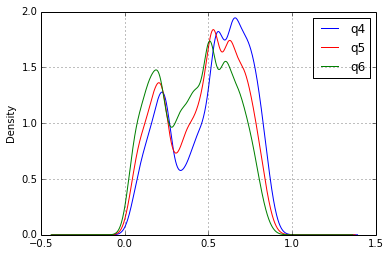

In [8]:
vr109 = virgin[virgin.line == 'r109']

fig = plt.figure()
ax = fig.add_subplot(111)
vr109.plot(kind='kde', colors=['b', 'r', 'g'], ax=ax)
mpld3.plugins.connect(fig, mpld3.plugins.MousePosition())

Peaks appear to be around 0.185-0.228